# Deals Information

## Import and Load the Data

In [1]:

import warnings
from math import sqrt

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import r2_score
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
except Exception:
    print("Seems we have a problem")


In [3]:
print("File Columns are:", df.columns)
print("Number of rows:", df.shape[0])

File Columns are: Index(['sale_day', 'address', 'property_type', 'rooms_number', 'floor',
       'build_year', 'building_mr', 'city', 'final_price', 'sale_day_year',
       'sale_day_month', 'street', 'street_number', 'neighborhood',
       'address_area', 'address_neighborhood'],
      dtype='object')
Number of rows: 416538


## Understanding the Values

### Who are the top cities (by count)

In [4]:
top_city = 20
df.groupby(['city']).city.value_counts().nlargest(top_city)


city         city       
ירושלים      ירושלים        34268
תל אביב יפו  תל אביב יפו    32796
חיפה         חיפה           30850
באר שבע      באר שבע        21523
פתח תקווה    פתח תקווה      20840
נתניה        נתניה          20383
ראשון לציון  ראשון לציון    19782
אשדוד        אשדוד          19540
אשקלון       אשקלון         15422
חולון        חולון          14486
רמת גן       רמת גן         12783
רחובות       רחובות         11294
בת ים        בת ים          11189
חדרה         חדרה            7634
נהריה        נהריה           7263
אילת         אילת            6027
קרית אתא     קרית אתא        5596
הרצליה       הרצליה          5331
בני ברק      בני ברק         5170
רעננה        רעננה           4973
Name: city, dtype: int64

### How Many Sales Per Year

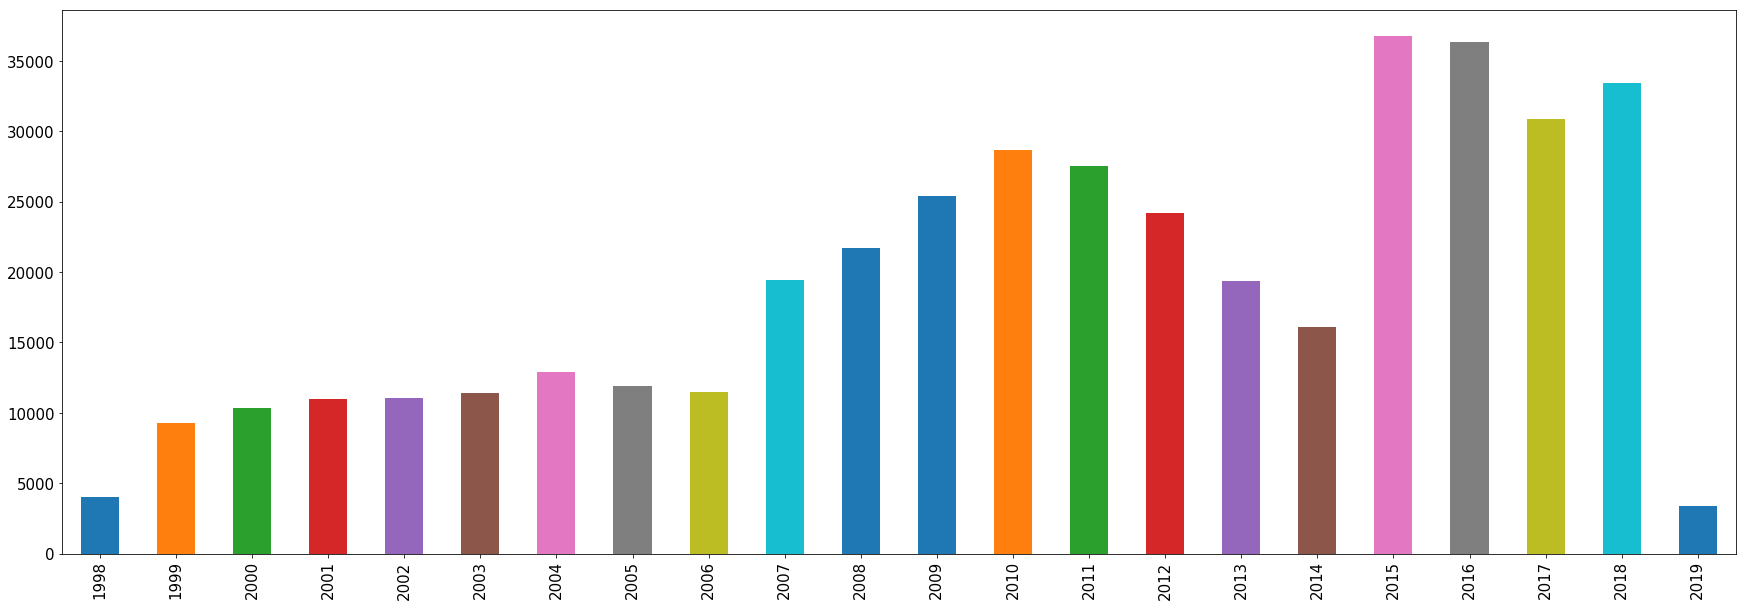

In [5]:

df['sale_day_year'].value_counts().sort_index().plot(kind="bar", figsize=(30, 10), fontsize=15)


### How Many Sales Per Months

We can notice that there are months that the number of sales is less than the normal.. (Feb, Sep, Oct)

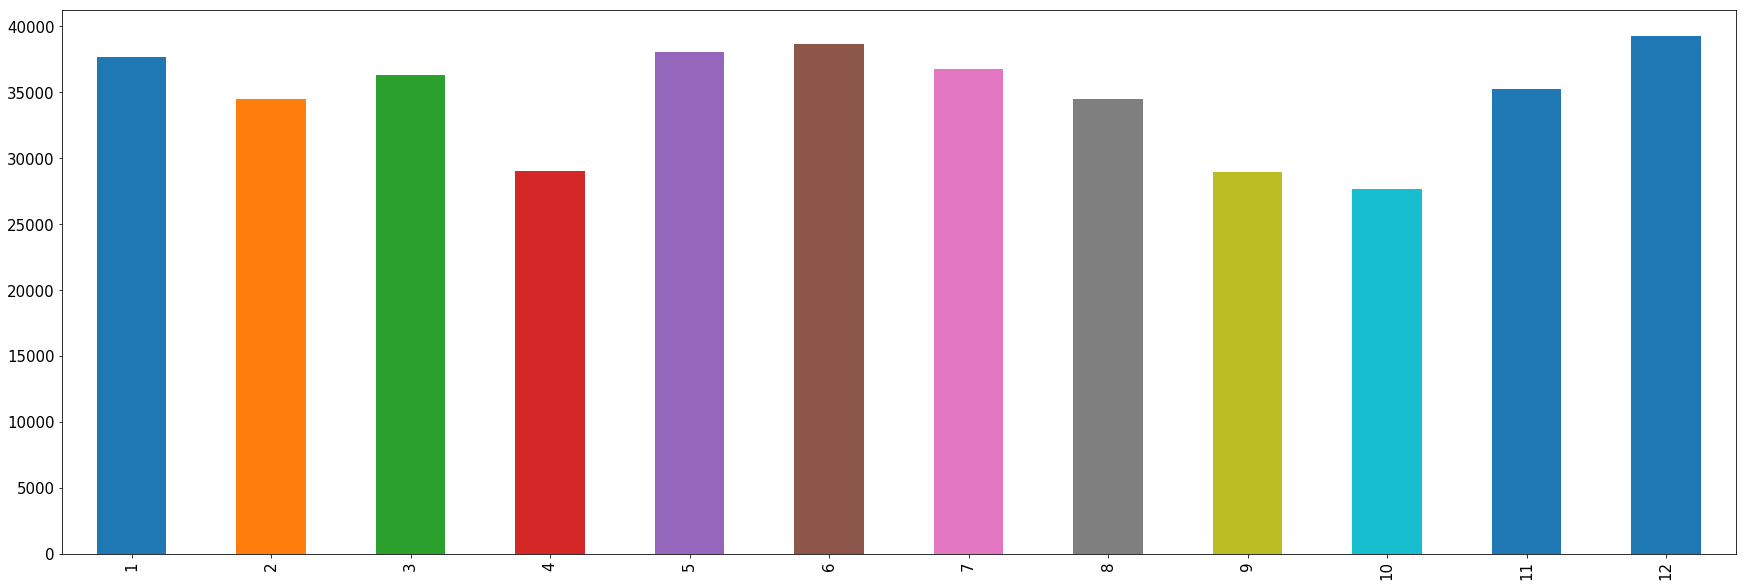

In [6]:

df['sale_day_month'].value_counts().sort_index().plot(kind="bar", figsize=(30, 10), fontsize=15)


### How Many Properies Built - Years

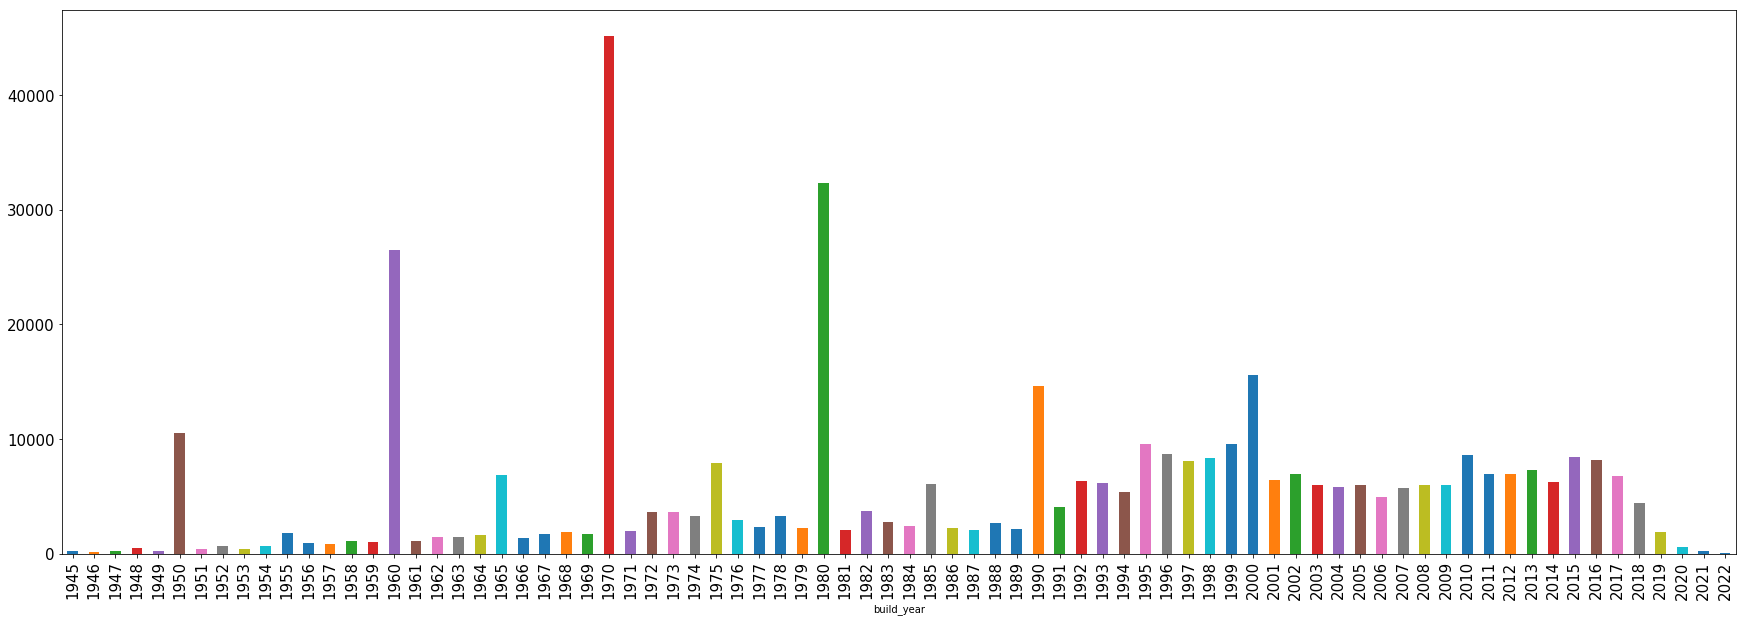

In [7]:

df['build_year'] = pd.to_datetime(df['build_year'], format="%Y")
_df = df.groupby([df["build_year"].dt.year])
_df['build_year'].count().plot(kind="bar", figsize=(30, 10), fontsize=15)

### Rooms Count

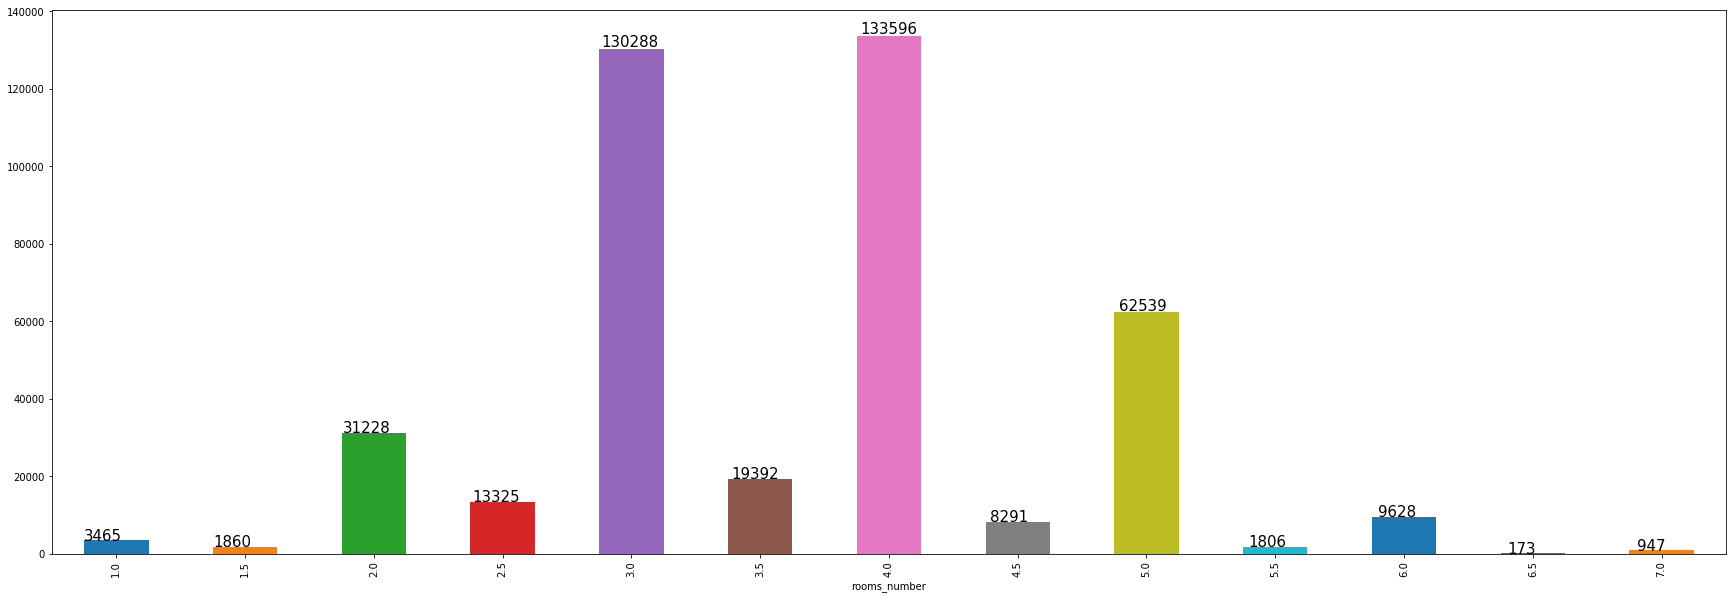

In [8]:
_df = df.groupby([df["rooms_number"]])
ax = _df['rooms_number'].count().plot(kind="bar", figsize=(30, 10))
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005), fontsize=15)

### Floors Count

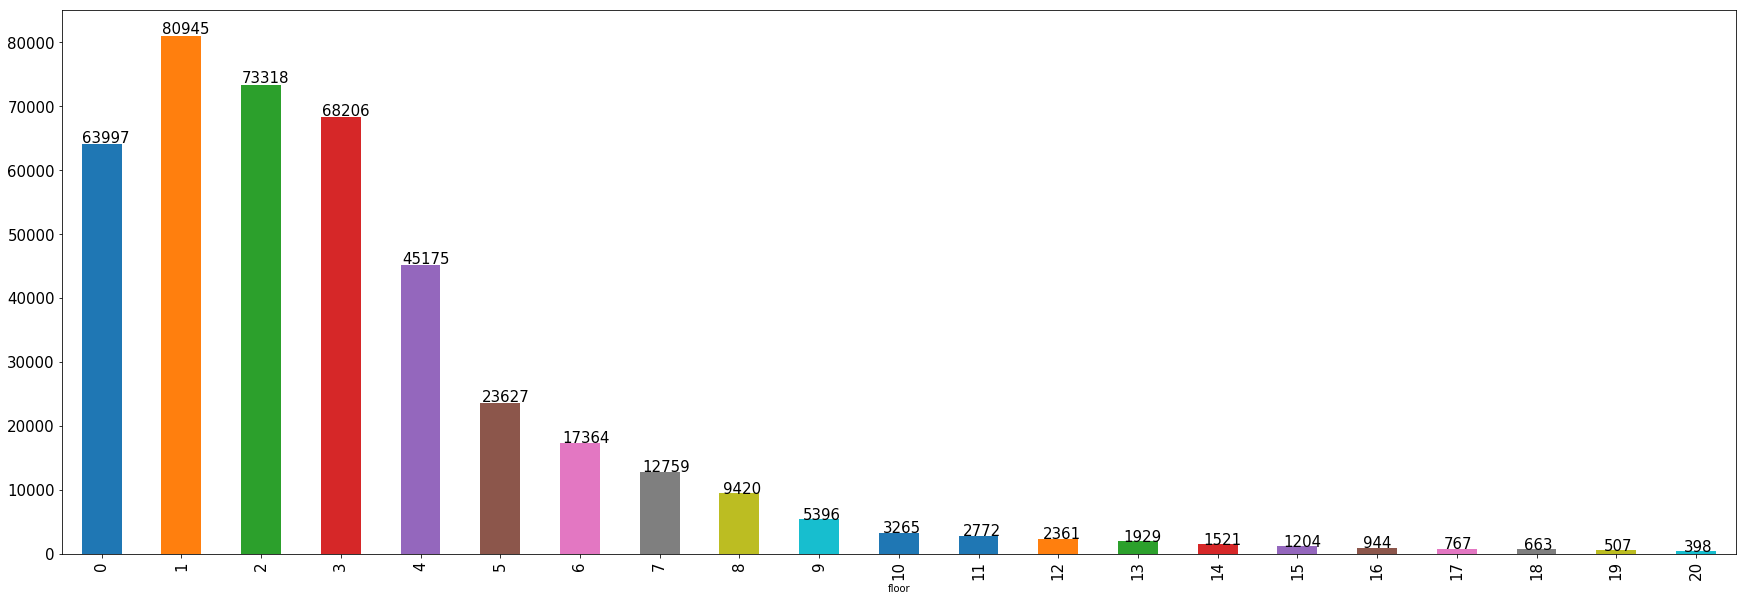

In [9]:
_df = df.groupby([df["floor"]])
ax = _df['floor'].count().plot(kind="bar", figsize=(30, 10), fontsize=15)
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005), fontsize=15)

### Building MR Count

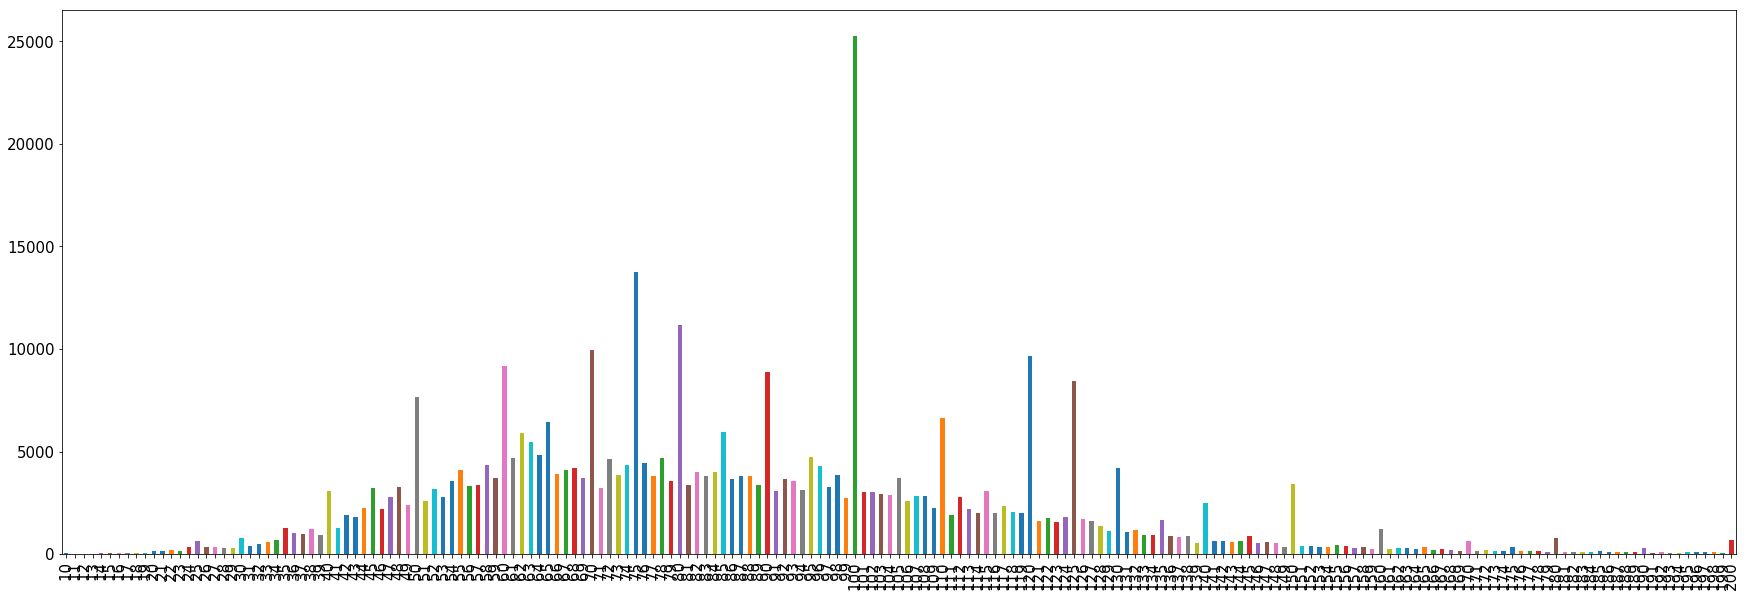

In [10]:

df['building_mr'].value_counts().sort_index().plot(kind="bar", figsize=(30, 10), fontsize=15)